## Значения, полученные экспериментально

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

pd.options.mode.chained_assignment = None  # default='warn'

### Калибровка

In [205]:
df_calibration = pd.DataFrame()
df_calibration["I"] = np.array([0, 10, 30, 50, 70, 100, 120, 150, 160, 180, 200, 230, 250, 270, 300, 330, 370])     # mA
df_calibration["B"] = np.array([12.28, 18.55, 43.6, 69.5, 89.1, 126.5, 154.6, 191.8, 204, 223, 248, 280, 301, 314, 332, 344, 358])  #mT

df_calibration["sigmaI"] = np.array([5 for i in range(len(df_calibration["I"]))])
df_calibration["sigmaB"] = np.array([2 for i in range(len(df_calibration["B"]))])

print("Len 1 = %d, len 2 = %d" %(len(df_calibration["I"]), len(df_calibration["B"])))
# df_calibration

Len 1 = 17, len 2 = 17


### Диск Корбино

In [206]:
df_corbino = pd.DataFrame()
df_corbino["I"] = np.array([0, 10, 20, 40, 70, 90, 100, 130, 150, 160, 200, 230, 250, 280, 310, 350, 360])
df_corbino["U"] = np.array([780, 793, 814, 896, 1030, 1162, 1225, 1493, 1720, 1877, 2313, 2642, 2848, 3128, 3317, 3524, 3556])      # delta U in mkV

df_corbino["sigmaI"] = np.array([5 for i in range(len(df_corbino["I"]))])
df_corbino["sigmaU"] = np.array([2 for i in range(len(df_corbino["U"]))])

print("Len 1 = %d, len 2 = %d" %(len(df_corbino["I"]), len(df_corbino["U"])))
# df_corbino

Len 1 = 17, len 2 = 17


### Пластина поперек

In [207]:
df_plate1 = pd.DataFrame()
df_plate1["I"] = np.array([0, 20, 50, 70, 80, 100, 110, 130, 140, 170, 190, 210, 230, 260, 300, 330, 360])
df_plate1["U"] = np.array([690, 696, 740, 760, 790, 837, 873, 907, 994, 1018, 1080, 1135, 1168, 1240, 1303, 1340, 1366])

df_plate1["sigmaI"] = np.array([5 for i in range(len(df_plate1["I"]))])
df_plate1["sigmaU"] = np.array([2 for i in range(len(df_plate1["U"]))])

print("Len 1 = %d, len 2 = %d" %(len(df_plate1["I"]), len(df_plate1["U"])))
# df_plate1

Len 1 = 17, len 2 = 17


### Пластина продольно


In [208]:
df_plate2 = pd.DataFrame()
df_plate2["I"] = np.array([0, 10, 30, 50, 80, 90, 110, 140, 160, 180, 200, 230, 240, 250, 270, 290, 320, 350])
df_plate2["U"] = np.array([685, 690, 721, 733, 762, 773, 786, 820, 842, 870, 892, 920, 932, 942, 963, 975, 993, 1010])

df_plate2["sigmaI"] = np.array([5 for i in range(len(df_plate2["I"]))])
df_plate2["sigmaU"] = np.array([2 for i in range(len(df_plate2["U"]))])
print("Len 1 = %d, len 2 = %d" %(len(df_plate2["I"]), len(df_plate2["U"])))
# df_plate2

Len 1 = 18, len 2 = 18


## Рассчеты

### Нарисуем график калибровки

<ErrorbarContainer object of 3 artists>

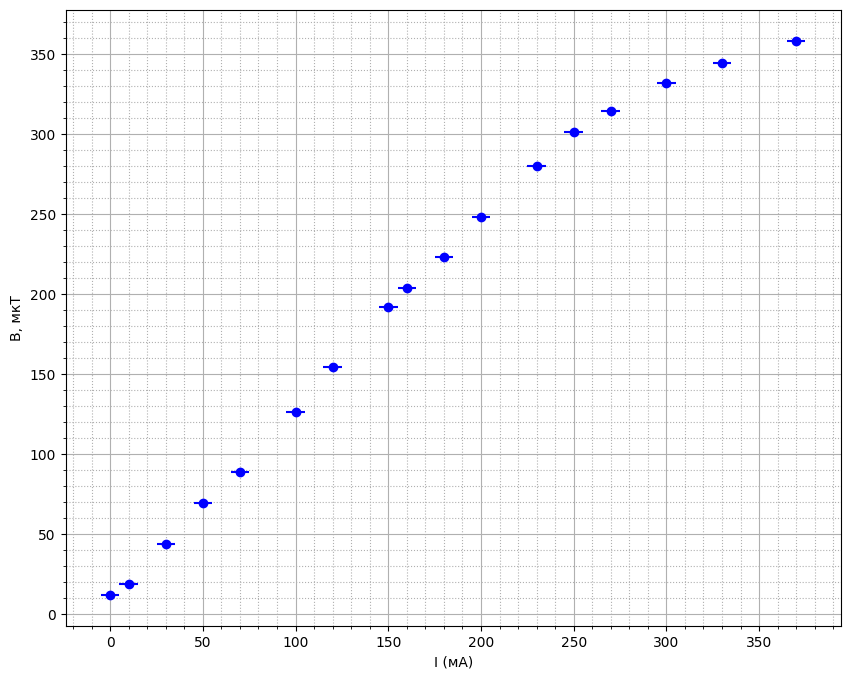

In [209]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.minorticks_on()
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')

ax.set_ylabel("B, мкT")
ax.set_xlabel("I (мA)")

# df_calibration["B old"] = df_calibration["B"]
# df_calibration["I old"] = df_calibration["I"]
ax.errorbar(df_calibration["I"], df_calibration["B"], xerr=df_calibration["sigmaI"], yerr=df_calibration["sigmaB"], fmt='o', color='blue')
# Выделим линейную часть
# df_calibration["B"] = df_calibration["B"][:-3]
# df_calibration["I"] = df_calibration["I"][:-3]
# ax.errorbar(df_calibration["I"], df_calibration["B"], xerr=df_calibration["sigmaI"], yerr=df_calibration["sigmaB"], fmt='o', color='red')

### Рассчитаем B для соответствующих измерениям токов

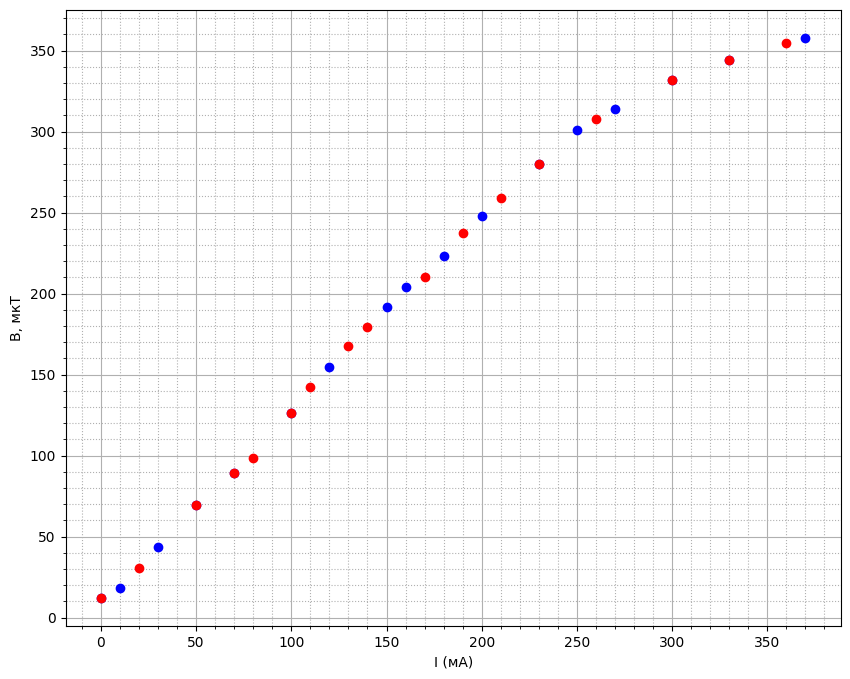

In [210]:
def b_by_i(df):
    df["B"] = np.array([0 for i in range(len(df["I"]))])
    for i in range(len(df["I"])):
        for j in range(len(df_calibration["I"]) - 1):
            if (df_calibration["I"][j] >= df["I"][i] or j == len(df_calibration) - 2):
                k = (df_calibration["B"][j+1] - df_calibration["B"][j]) / (df_calibration["I"][j+1] - df_calibration["I"][j])
                df["B"][i] = df_calibration["B"][j] + k * (df["I"][i] - df_calibration["I"][j])
                break


b_by_i(df_corbino)
b_by_i(df_plate1)
b_by_i(df_plate2)


# print('corbino\n', df_corbino)
# print('plate 1\n', df_plate1)
# print('plate 2\n', df_plate2)

# Check results
# ---------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize = (10, 8))
ax.minorticks_on()
ax.set_ylabel("B, мкT")
ax.set_xlabel("I (мA)")
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')

ax.plot(df_calibration["I"], df_calibration["B"], 'o', color='blue')
ax.plot(df_plate1["I"], df_plate1["B"], 'o', color='red')
# ---------------------------------------------------------------------------------

### Рассчитаем R

In [211]:
df_corbino["R"] = np.array(df_corbino["U"] / (25.5))
df_plate1["R"] = np.array(df_plate1["U"] / (10))
df_plate2["R"] = np.array(df_plate2["U"] / (10))



df_corbino["B2"] = df_corbino["B"] ** 2 * 0.001
df_plate1["B2"] = df_plate1["B"] ** 2 * 0.001
df_plate2["B2"] = df_plate2["B"] ** 2 * 0.001

### Рассчет погрешностей

In [212]:
def err_rate(df):
    df["sigmaB"] = df["B"] * 0.02
    df["sigmaB2"] = df["B2"] * 2 * (df["sigmaB"] / df["B"])
    df["sigmaR"] = df["R"] * ((df["sigmaU"] / df["U"]) ** 2 + (df["sigmaI"] / df["I"]) ** 2) ** 0.5
    df.replace(np.inf, df["R"][0] * 0.3, inplace=True)

err_rate(df_corbino)
err_rate(df_plate1)
err_rate(df_plate2)

df_corbino

,I,U,sigmaI,sigmaU,B,R,B2,sigmaB,sigmaB2,sigmaR
0,0,780,5,2,12.28,30.588235,0.150798,0.2456,0.006032,9.176471
1,10,793,5,2,18.55,31.098039,0.344103,0.3710,0.013764,15.549217
2,20,814,5,2,30.65,31.921569,0.939423,0.6130,0.037577,7.980778
3,40,896,5,2,59.70,35.137255,3.564090,1.1940,0.142564,4.392857
4,70,1030,5,2,89.10,40.392157,7.938810,1.7820,0.317552,2.886220
5,90,1162,5,2,112.45,45.568627,12.645003,2.2490,0.505800,2.532805
6,100,1225,5,2,126.50,48.039216,16.002250,2.5300,0.640090,2.403241
7,130,1493,5,2,167.40,58.549020,28.022760,3.3480,1.120910,2.253251
8,150,1720,5,2,191.80,67.450980,36.787240,3.8360,1.471490,2.249734
9,160,1877,5,2,204.00,73.607843,41.616000,4.0800,1.664640,2.301582


### Построим график R(B^2)

k corbino = 0.8617396968357607 (blue)
k plate1 = 0.526173693223559 (red)
k plate2 = 0.24238847954084305 (green)


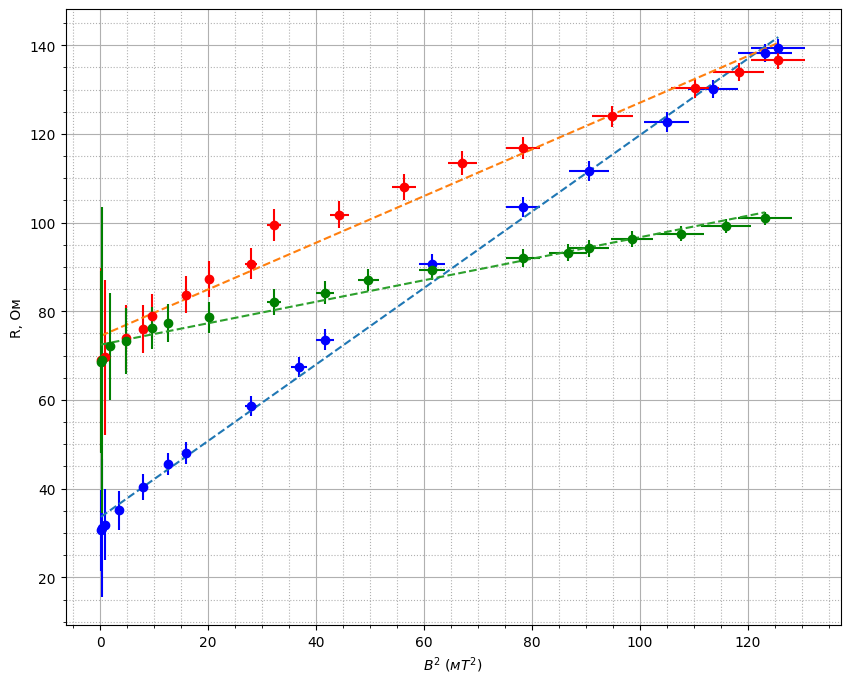

In [213]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.minorticks_on()
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')
ax.set_ylabel("R, Ом")
ax.set_xlabel("$B^2$ ($мT^2$)")

def drow(df, color, label):
    ax.errorbar(df["B2"], df["R"], xerr=df["sigmaB2"], yerr=df["sigmaR"], fmt='o', color=color)
    p = np.polyfit(df["B2"], df["R"], 1)
    ya = np.polyval(p, df["B2"])
    ax.plot(df["B2"], ya, linestyle='dashed')
    df["m2"] = (ya[1] - ya[0]) / (df["B2"][1] - df["B2"][0])
    print(label, df["m2"][0], '(' + color + ')')

drow(df_corbino, 'blue', 'k corbino =')
drow(df_plate1, 'red', 'k plate1 =')
drow(df_plate2, 'green', 'k plate2 =')



In [214]:
# Old version
# ----------------------------------------------------------------------------------------------------------------------

# ax.plot(df_corbino["B2"], df_corbino["R"], 'o', color='blue')
# ax.errorbar(df_corbino["B2"], df_corbino["R"], xerr=df_corbino["sigmaB2"], yerr=df_corbino["sigmaR"], fmt='o', color='blue')
# p = np.polyfit(df_corbino["B2"], df_corbino["R"], 1)
# ya = np.polyval(p, df_corbino["B2"])
# ax.plot(df_corbino["B2"], ya, linestyle='dashed')
# df_corbino["m2"] = (ya[1] - ya[0]) / (df_corbino["B2"][1] - df_corbino["B2"][0])
# print("k corbino =", df_corbino["m2"][0], '(blue)')

# ax.plot(df_plate1["B2"], df_plate1["R"], 'o', color='red')
# p = np.polyfit(df_plate1["B2"], df_plate1["R"], 1)
# ya = np.polyval(p, df_plate1["B2"])
# ax.plot(df_plate1["B2"], ya, linestyle='dashed')
# df_plate1["m2"] = (ya[1] - ya[0]) / (df_plate1["B2"][1] - df_plate1["B2"][0])
# print("k plate1 =", df_plate1["m2"][0], '(red)')

# ax.plot(df_plate2["B2"], df_plate2["R"], 'o', color='green')
# p = np.polyfit(df_plate2["B2"], df_plate2["R"], 1)
# ya = np.polyval(p, df_plate2["B2"])
# ax.plot(df_plate2["B2"], ya, linestyle='dashed')
# df_plate2["m2"] = (ya[1] - ya[0]) / (df_plate2["B2"][1] - df_plate2["B2"][0])
# print("k plate2 =", df_plate2["m2"][0], '(green)')

# ----------------------------------------------------------------------------------------------------------------------